### Storytelling Data Visualization on Exchange Rates

Our focus in this project will be on the exchange rate between the euro and the American dollar in order to practice visualization skills.

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
exchange_rates = pd.read_csv('datasets/euro-daily-hist_1999_2020.csv')

In [272]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [273]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [274]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

**Data cleaning**

In [275]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)

In [276]:
exchange_rates.reset_index(drop=True, inplace=True)

Let's isolate the USD.EUR exchange

In [277]:
euro_to_dollar = exchange_rates[["Time", "US_dollar"]]

In [278]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.5508     1
1.4250     1
1.4405     1
0.8823     1
0.8720     1
Name: US_dollar, Length: 3528, dtype: int64

We will drop all the rows where the - character appears in the US_dollar column

In [279]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]

In [280]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1346    6
1.3373    6
         ..
1.5508    1
1.4250    1
1.4405    1
0.8823    1
0.8720    1
Name: US_dollar, Length: 3527, dtype: int64

In [281]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype("float")

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

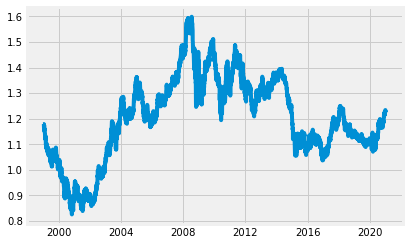

In [282]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

Next we look at the simple 30 days rolling mean.

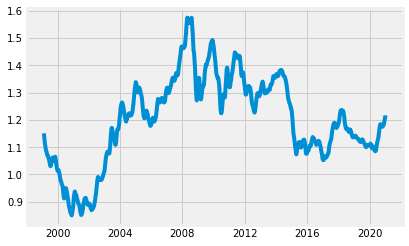

In [283]:
plt.plot(euro_to_dollar['Time'],  euro_to_dollar['US_dollar'].rolling(30).mean())

In [284]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


### Next, we'll visualize how how the euro-dollar rate has changed during the coronavirus pandemic.

In [285]:
from_2016 = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year <= 2020) ]
from_2016.sort_values(by="Time", inplace=True)

<ipython-input-285-9848aa7c6947>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_2016.sort_values(by="Time", inplace=True)


On 31 December 2019, WHO was informed of cases of pneumonia of unknown cause in Wuhan City, China. So we'll plot it from there until the end of 2020 (while noticing that in parts of the world it is still an ongoing problem).

In [286]:
covid = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year <= 2020) ]

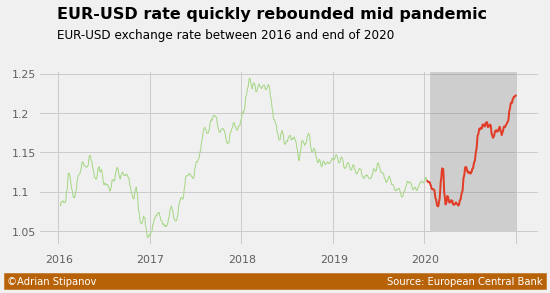

In [287]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(from_2016['Time'], from_2016["US_dollar"].rolling(7).mean(),
        linewidth=1, color='#A6D785'
       )
ax.plot(covid['Time'], covid["US_dollar"].rolling(7).mean(),
        linewidth=2, color='#e23d28')

# Setting title
ax.text(x=16800, y=1.32, s="EUR-USD rate quickly rebounded mid pandemic", size=16, weight='bold')
ax.text(x=16800, y=1.295, s="EUR-USD exchange rate between 2016 and end of 2020", size=12)

# Highlihting Covid
ax.axvspan(xmin=18285, xmax=18625, ymin=0.09,
           alpha=0.3, color='grey')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
x = 16750
for year in ['2016', '2017', '2018', '2019', '2020']:
    ax.text(x, 1.01, year, alpha=0.6, fontsize=11)
    x += 365

y = 1.045
for rate in ['1.05', '1.1', '1.15', '1.2', '1.25']:
    ax.text(16620, y, rate, alpha=0.6, fontsize=11)
    y += 0.05

# Adding copyright
ax.text(16600, 0.983, '©Adrian Stipanov' + ' '*93 + 'Source: European Central Bank',
        color = 'white', backgroundcolor = '#b86207',
        size=10);